In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
titanic_data.head()
print(titanic_data.info())
# Fill missing 'Age' values with the median without using inplace
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())
# Fill missing 'Age' values with the median without using inplace
titanic_data = titanic_data.dropna(subset=['Embarked'])

# Print the dataframe info to verify
print(titanic_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived

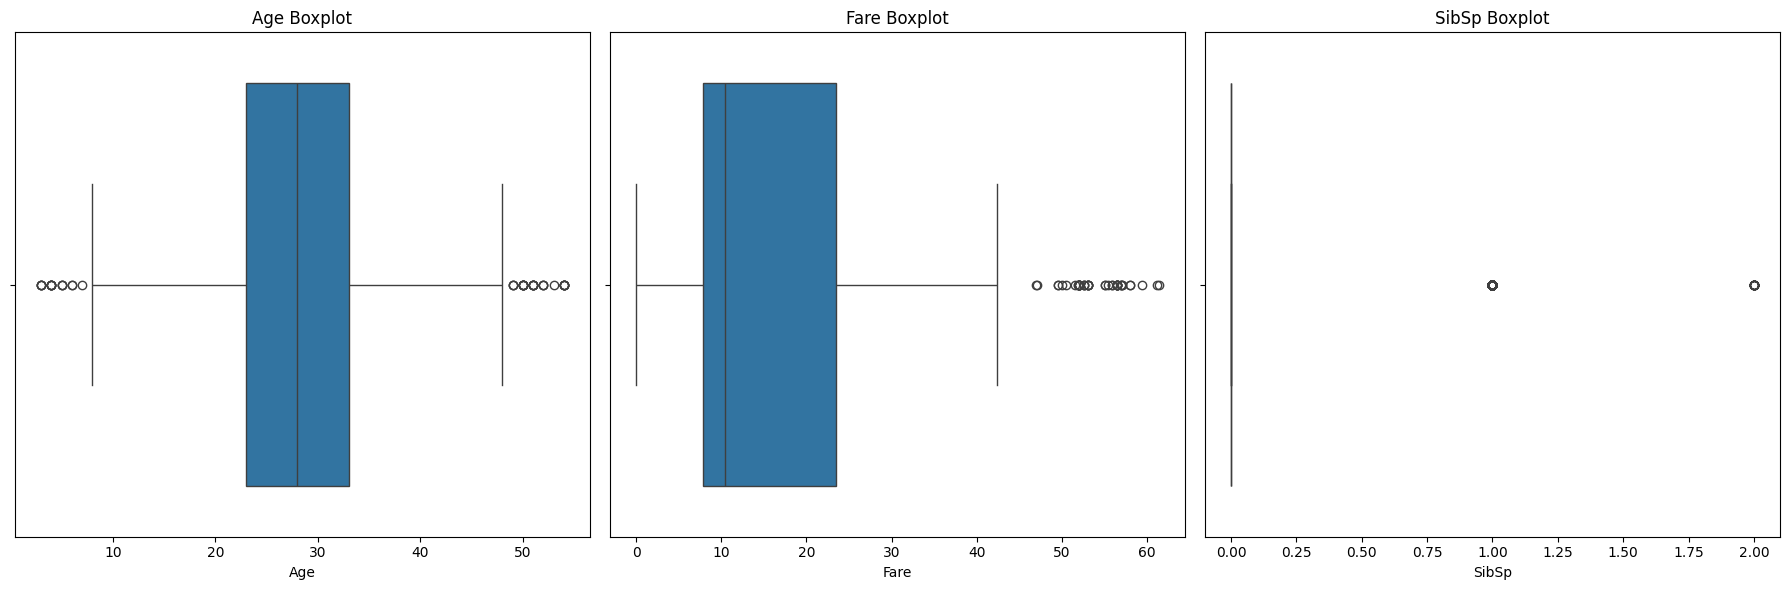

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  689 non-null    int64  
 1   Survived     689 non-null    int64  
 2   Pclass       689 non-null    int64  
 3   Name         689 non-null    object 
 4   Sex          689 non-null    object 
 5   Age          689 non-null    float64
 6   SibSp        689 non-null    int64  
 7   Parch        689 non-null    int64  
 8   Ticket       689 non-null    object 
 9   Fare         689 non-null    float64
 10  Cabin        97 non-null     object 
 11  Embarked     689 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 70.0+ KB
None


In [3]:
# Function to detect and remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for 'Age', 'Fare', and 'SibSp'
titanic_data = remove_outliers(titanic_data, 'Age')
titanic_data = remove_outliers(titanic_data, 'Fare')
titanic_data = remove_outliers(titanic_data, 'SibSp')

# Visualize boxplots to check for outliers after removal
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x=titanic_data['Age'])
axes[0].set_title('Age Boxplot')

sns.boxplot(ax=axes[1], x=titanic_data['Fare'])
axes[1].set_title('Fare Boxplot')

sns.boxplot(ax=axes[2], x=titanic_data['SibSp'])
axes[2].set_title('SibSp Boxplot')

plt.tight_layout()
plt.show()

print(titanic_data.info())

In [4]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  689 non-null    int64  
 1   Survived     689 non-null    int64  
 2   Pclass       689 non-null    int64  
 3   Name         689 non-null    object 
 4   Sex          689 non-null    object 
 5   Age          689 non-null    float64
 6   SibSp        689 non-null    int64  
 7   Parch        689 non-null    int64  
 8   Ticket       689 non-null    object 
 9   Fare         689 non-null    float64
 10  Cabin        97 non-null     object 
 11  Embarked     689 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 70.0+ KB
None


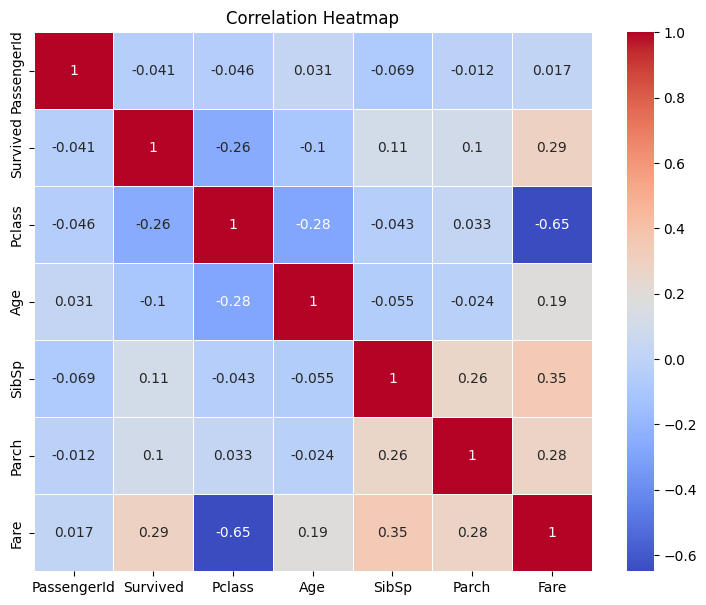

In [8]:
# Drop non-numeric columns before computing the correlation matrix
numeric_titanic_data = titanic_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(numeric_titanic_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


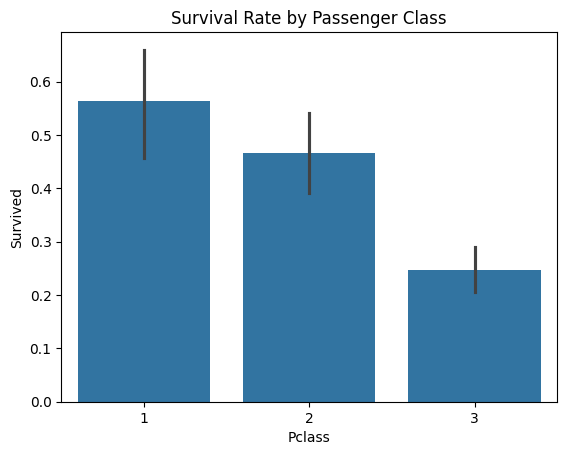

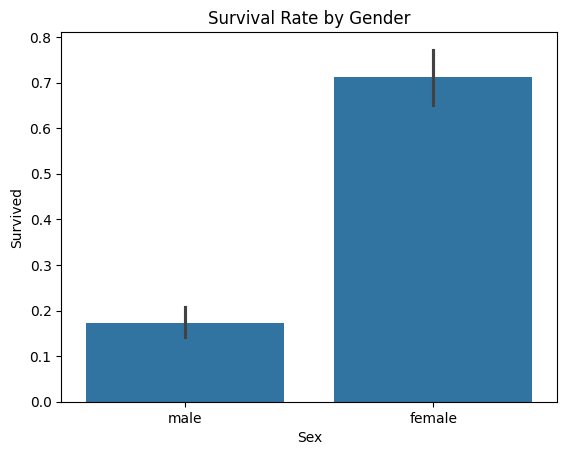

In [9]:
# Survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

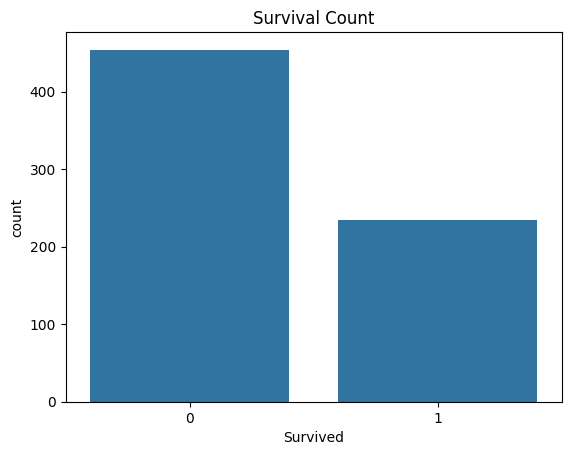

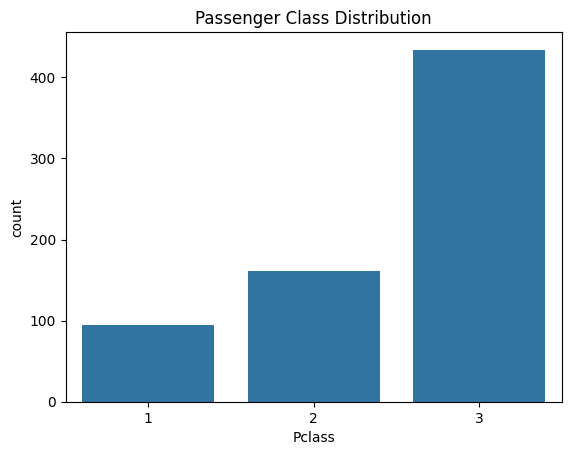

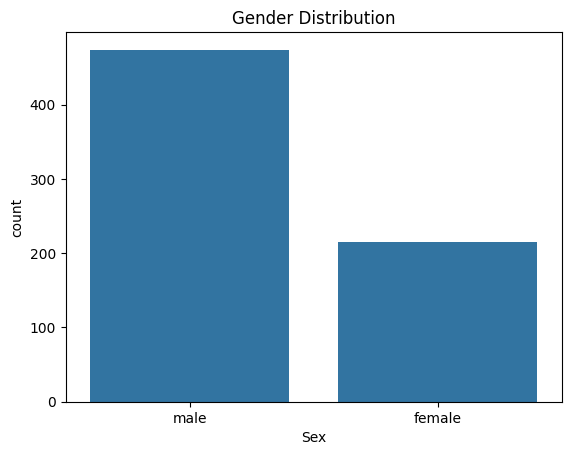

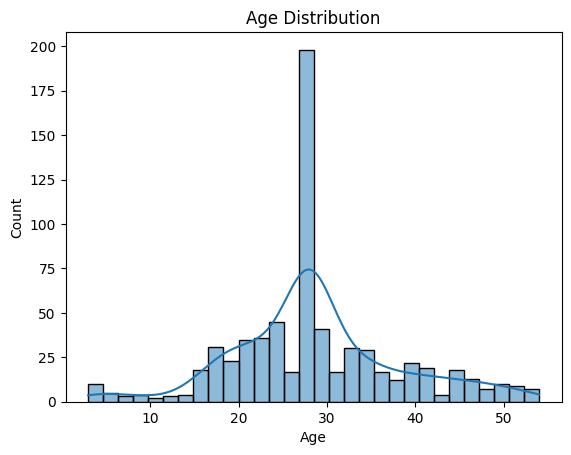

In [11]:
# Distribution of 'Survived'
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

# Distribution of 'Pclass'
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()

# Distribution of 'Sex'
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')
plt.show()

# Distribution of 'Age'
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


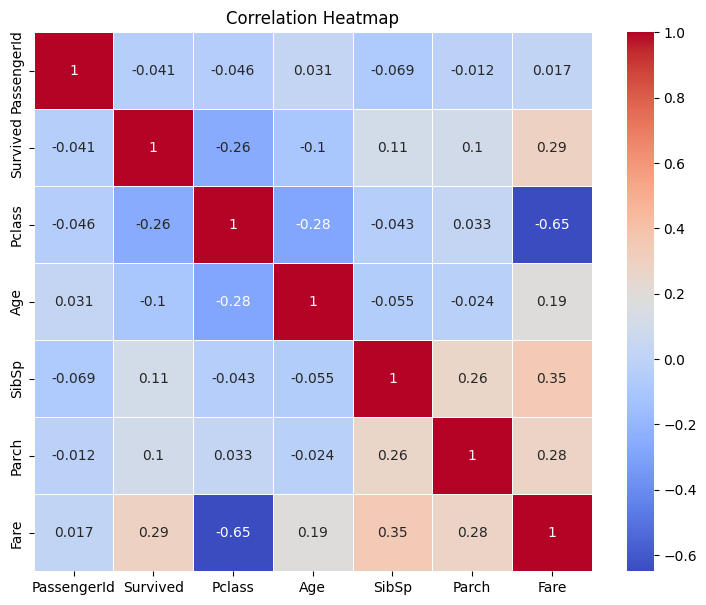

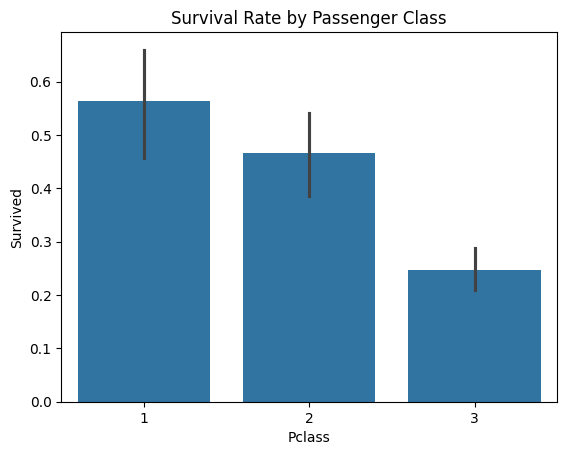

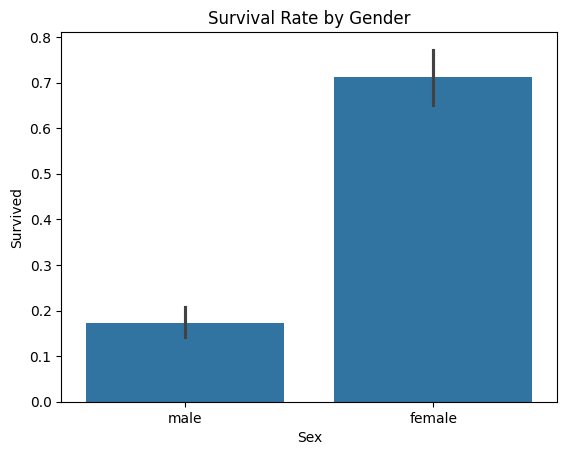

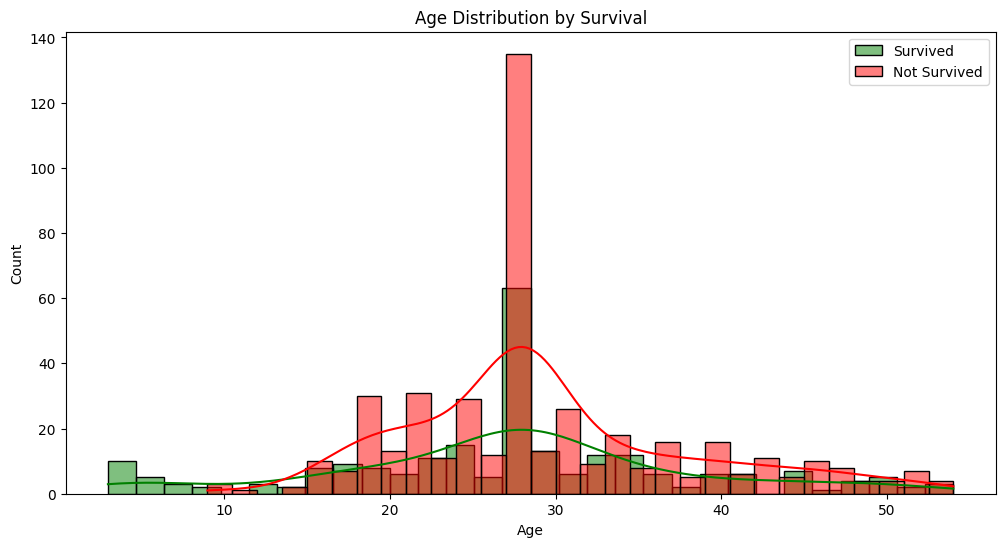

In [15]:
# Correlation heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Survival rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by Age (Age vs. Survived)
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data[titanic_data['Survived'] == 1]['Age'].dropna(), bins=30, color='green', kde=True, label='Survived')
sns.histplot(titanic_data[titanic_data['Survived'] == 0]['Age'].dropna(), bins=30, color='red', kde=True, label='Not Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


In [16]:
# Display data types of each column
print(titanic_data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [17]:
# Show basic descriptive statistics for numerical columns
print(titanic_data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   689.000000  689.000000  689.000000  689.000000  689.000000   
mean    450.661829    0.341074    2.493469   28.711176    0.272859   
std     258.668859    0.474415    0.723586    9.545220    0.501020   
min       1.000000    0.000000    1.000000    3.000000    0.000000   
25%     223.000000    0.000000    2.000000   23.000000    0.000000   
50%     450.000000    0.000000    3.000000   28.000000    0.000000   
75%     674.000000    1.000000    3.000000   33.000000    0.000000   
max     891.000000    1.000000    3.000000   54.000000    2.000000   

            Parch        Fare  
count  689.000000  689.000000  
mean     0.269956   16.631246  
std      0.754625   13.092563  
min      0.000000    0.000000  
25%      0.000000    7.854200  
50%      0.000000   10.500000  
75%      0.000000   23.450000  
max      6.000000   61.379200  


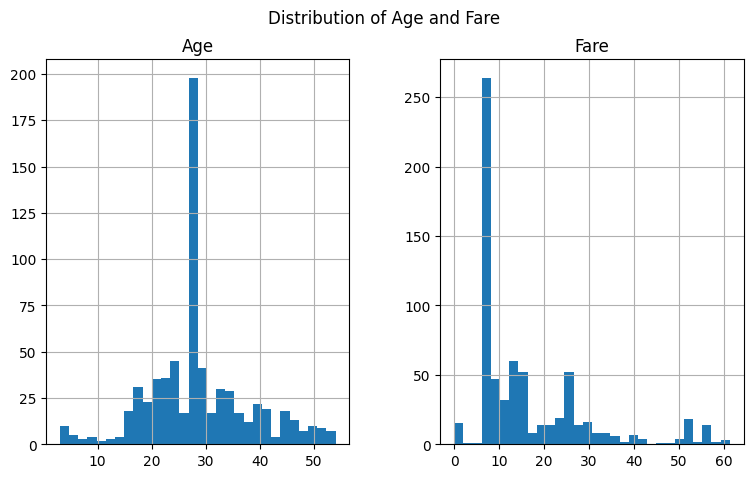

In [19]:
# Distribution of numerical columns (e.g., Age, Fare)
titanic_data[['Age', 'Fare']].hist(bins=30, figsize=(9, 5))
plt.suptitle('Distribution of Age and Fare')
plt.show()


In [20]:
from scipy import stats

# Prepare the contingency table for gender vs survival
contingency_table = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
print("Contingency Table:")
print(contingency_table)

# Performing the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Printing the results
print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Result
if p < 0.05:
    print("\nReject the null hypothesis: There is a significant difference in survival rates between males and females.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference in survival rates between males and females.")


Contingency Table:
Survived    0    1
Sex               
female     62  153
male      392   82

Chi-Square Test Results:
Chi2 Statistic: 188.5508120290262
P-value: 6.586636367901935e-43

Reject the null hypothesis: There is a significant difference in survival rates between males and females.
